Username Dicoding : Hakim_adni

Nama              : Hakim Amal Adni

Email             : Hakim.adni@gmail.com

#Pertanyaan Bisnis


1.   Hotspot Jam sepeda paling banyak di rental berdasarkan Hari kerja atau tidak
2.   Pengaruh Cuaca pada penggunaan rental sepeda

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Wrangling
##Gathering Data



In [2]:
data_day = pd.read_csv("data/day.csv")
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data_hour = pd.read_csv("data/hour.csv")
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##Assesing Data

In [4]:
print("Total Missing Value pada Dataframe per Jam\n", data_hour.isna().sum(),
      "\nTotal duplicate pada Dataframe per Jam :", data_hour.duplicated().sum())

Total Missing Value pada Dataframe per Jam
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 
Total duplicate pada Dataframe per Jam : 0


In [5]:
print("Statistik Numertik pada Dataframe per Jam\n", data_hour.describe())
print("\nStatistik Numertik pada Dataframe per Hari\n", data_day.describe())

Statistik Numertik pada Dataframe per Jam
           instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2

In [6]:
#Tipe data Dataframe
data_hour.info()
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

##Cleaning Data

Data sudah bersih dari duplikat

In [7]:
data_hour.drop('instant', axis = 1, inplace= True)
data_day.drop('instant', axis = 1, inplace= True)

In [8]:
data_hour.rename(columns={'dteday':'date','hr':'hour','yr':'year','mnth':'month','cnt' : 'total'},inplace=True)
data_day.rename(columns={'dteday':'date','hr':'hour','yr':'year','mnth':'month','cnt' : 'total'},inplace=True)
data_hour['date'] = pd.to_datetime(data_hour['date'])
data_day['date'] = pd.to_datetime(data_day['date'])
data_hour.season.replace((1,2,3,4),('Spring','Summer','Fall','Winter'),inplace=True)
data_day.season.replace((1,2,3,4),('Spring','Summer','Fall','Winter'),inplace=True)
data_hour.year.replace((0,1),('2011','2012'),inplace=True)
data_day.year.replace((0,1),('2011','2012'),inplace=True)
data_hour.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
data_day.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
data_hour.holiday.replace((0,1),('No','Yes'),inplace=True)
data_day.holiday.replace((0,1),('No','Yes'),inplace=True)
data_hour.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
data_day.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
data_hour.workingday.replace((0,1),('No','Yes'),inplace=True)
data_day.workingday.replace((0,1),('No','Yes'),inplace=True)
data_hour.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

In [9]:
data_hour.head()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
0,2011-01-01,Spring,2011,Jan,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


##Explore Data Analysis

In [10]:
data_hour.describe(include="all")

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
count,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,May,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
data_hour.groupby(by='season').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : 'sum'
}).sort_values(by='total',ascending=True)

,casual,registered,total
season,,,
Spring,60622,410726,471348
Winter,129782,711831,841613
Summer,203522,715067,918589
Fall,226091,835038,1061129


In [12]:
data_hour.groupby(by='year').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : 'sum'
}).sort_values(by='total',ascending=True)

,casual,registered,total
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


In [13]:
data_pivot = data_hour.groupby(by='month').agg({
    'casual': ['sum', 'mean'],
    'registered': ['sum', 'mean'],
    'total': 'sum'
})

# Mengurutkan berdasarkan kolom 'total' sum
data_sorted = data_pivot.sort_values(by=('total', 'sum'), ascending=False)

# Menampilkan hasil
print(data_sorted)

      casual            registered               total
         sum       mean        sum        mean     sum
month                                                 
Aug    72039  48.840000     279155  189.257627  351194
Jun    73906  51.323611     272436  189.191667  346342
Sep    70323  48.937370     275668  191.835769  345991
Jul    78157  52.524866     266791  179.295027  344948
May    75285  50.594758     256401  172.312500  331686
Oct    59760  41.185389     262592  180.973122  322352
Apr    60802  42.311761     208292  144.949200  269094
Nov    36603  25.471816     218228  151.863605  254831
Mar    44444  30.172437     184476  125.238289  228920
Dec    21693  14.627782     189343  127.675657  211036
Feb    14963  11.158091     136389  101.706935  151352
Jan    12042   8.426872     122891   85.997901  134933


In [14]:
data_hour.groupby(by='hour').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : 'sum'
}).sort_values(by='total',ascending=True)

,casual,registered,total
hour,,,
4,874,3554,4428
3,1893,6281,8174
5,1012,13249,14261
2,3412,12940,16352
1,4709,19455,24164
0,7375,31755,39130
6,3017,52115,55132
23,11065,52876,63941
22,16200,79412,95612


In [15]:
data_hour.groupby(by='holiday').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : 'sum'
})

,casual,registered,total
holiday,,,
No,597658,2616586,3214244
Yes,22359,56076,78435


In [16]:
data_hour.groupby(by='weekday').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : 'sum'
}).sort_values(by='total',ascending=True)

,casual,registered,total
weekday,,,
Sunday,140521,303506,444027
Monday,70784,384719,455503
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048
Saturday,153852,323955,477807
Thursday,61460,423935,485395
Friday,78238,409552,487790


In [17]:
data_hour.groupby(by='workingday').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : 'sum'
}).sort_values(by='total',ascending=True)


,casual,registered,total
workingday,,,
No,316732,683537,1000269
Yes,303285,1989125,2292410


In [18]:
data_hour.groupby(by='weathersit').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'total' : 'sum'
}).sort_values(by='total',ascending=True)

,casual,registered,total
weathersit,,,
Heavy_rainsnow,8,215,223
Light_rainsnow,22783,135548,158331
Misty,134481,661471,795952
Clear,462745,1875428,2338173


#Visualization & Explanatory Analysis

## 1. Hotspot Jam sepeda di rental berdasarkan hari kerja atau tidak

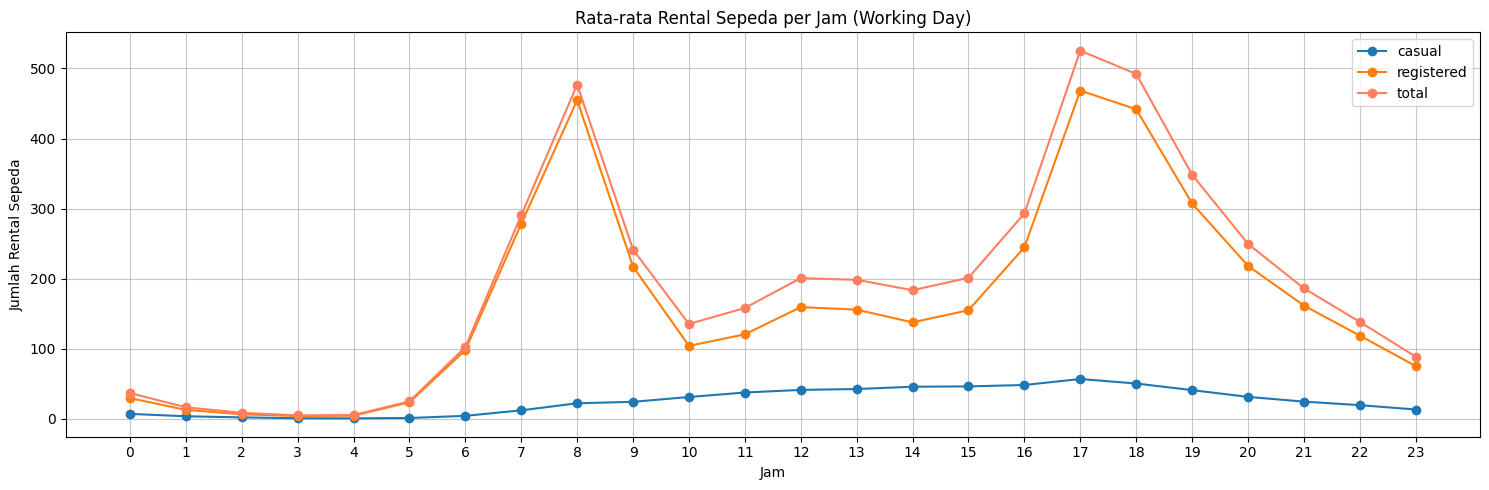

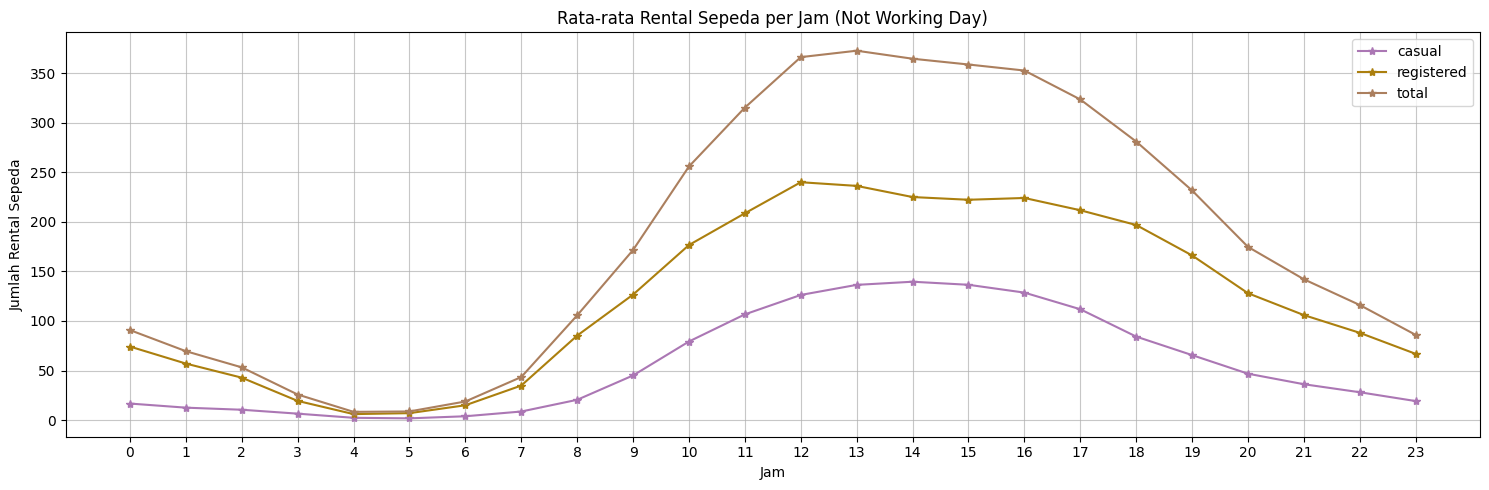

In [19]:
data_sum_perjam = data_hour.groupby(by=['hour', 'workingday']).agg({
    'casual': 'mean',
    'registered': 'mean',
    'total': 'mean'
}).sort_values(by='hour', ascending=True).reset_index()

# Separate data by working day
data_wday = data_sum_perjam[data_sum_perjam['workingday'] == 'Yes'].reset_index()
data_nwday = data_sum_perjam[data_sum_perjam['workingday'] == 'No'].reset_index()

# Plot for Working Days
plt.figure(figsize=(15, 5))

ax1 = data_wday[['casual', 'registered', 'total']].plot(
    color=['#1f77b4', '#ff7f0e', '#ff7f5e'], marker='o', ax=plt.gca(),
    label=['Casual (Working Day)', 'Registered (Working Day)', 'Total (Working Day)']
)

ax1.set_xticks(range(24))  # Ensure all hours (0–23) are labeled
plt.grid(True, alpha=0.7)
plt.title("Rata-rata Rental Sepeda per Jam (Working Day)")
plt.xlabel("Jam")
plt.ylabel("Jumlah Rental Sepeda")
plt.tight_layout()

# Show the plot for working days
plt.show()

# Plot for Non-Working Days
plt.figure(figsize=(15, 5))

ax2 = data_nwday[['casual', 'registered', 'total']].plot(
    color=['#ab77b4', '#ab7f0e', '#ab7f5e'], marker='*', ax=plt.gca(),
    label=['Casual (Not Working Day)', 'Registered (Not Working Day)', 'Total (Not Working Day)']
)

ax2.set_xticks(range(24))  # Ensure all hours (0–23) are labeled
plt.grid(True, alpha=0.7)
plt.title("Rata-rata Rental Sepeda per Jam (Not Working Day)")
plt.xlabel("Jam")
plt.ylabel("Jumlah Rental Sepeda")
plt.tight_layout()
plt.show()

##2. Pengaruh Cuaca pada penggunaan rental sepeda

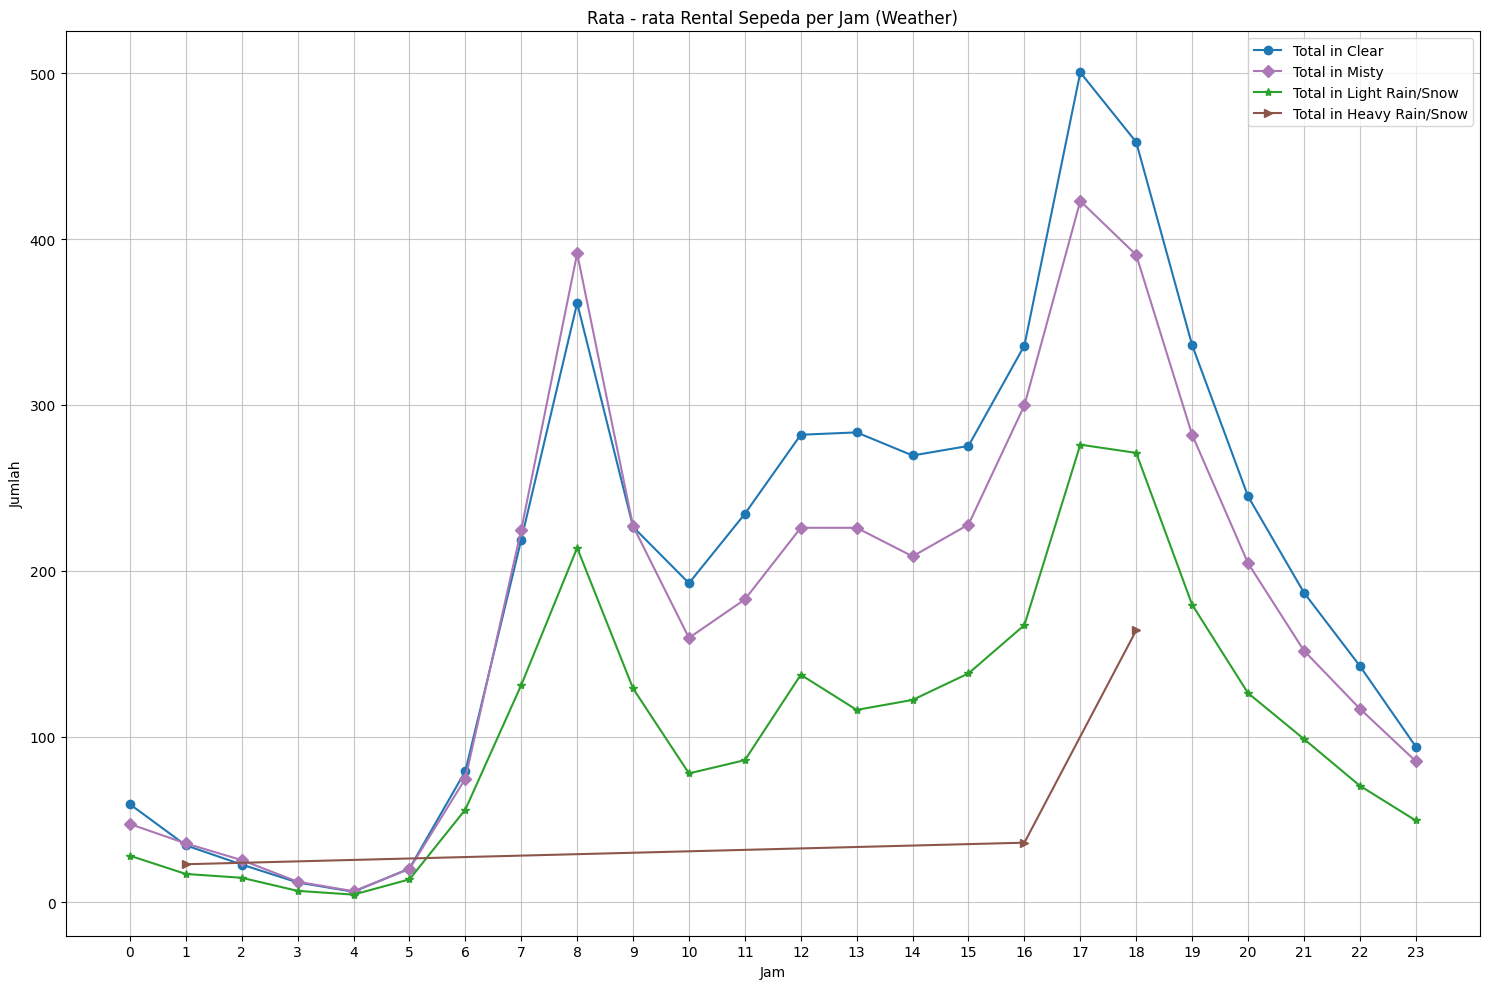

In [20]:
data_per_cuaca = data_hour.groupby(by=['hour','weathersit']).agg({
    'total' : 'mean'
}).sort_values(by='hour',ascending=True).reset_index()

data_clear = data_per_cuaca[data_per_cuaca['weathersit'] == 'Clear'].reset_index()
data_misty = data_per_cuaca[data_per_cuaca['weathersit'] == 'Misty'].reset_index()
data_light_rainsnow = data_per_cuaca[data_per_cuaca['weathersit'] == 'Light_rainsnow'].reset_index()
data_heavy_rainsnow = data_per_cuaca[data_per_cuaca['weathersit'] == 'Heavy_rainsnow'].reset_index()

datas = [
    (data_clear, '#1f77b4', 'Clear', 'o'),
    (data_misty, '#ab77b4', 'Misty', 'D'),
    (data_light_rainsnow, '#2ca02c', 'Light Rain/Snow', '*'),
    (data_heavy_rainsnow, '#8c564b', 'Heavy Rain/Snow', '>')
]

plt.figure(figsize=(15, 10))
for data, color, label, marker in datas:
    ax = data.plot(
        x='hour', y='total', color=color, marker=marker, ax=plt.gca(),
        label=f"Total in {label}", linestyle='-'
    )

ax.set_xticks(range(24))
plt.grid(True, alpha=0.7)
plt.title("Rata - rata Rental Sepeda per Jam (Weather)")
plt.xlabel("Jam")
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()


#Konklusi
##Pertanyaan No. 1

Pada Jam 7 - 9 Pagi dan 4 - 8 Malam di hari kerja jumlah rental berada diatas 10rb. sedangkan selain hari kerja selalu dibawah 10rb. Pengaruh Hari kerja dan jam berangkat dan pulang kerja sangat dominan pada penggunaan rental sepeda

##Pertanyaan No. 2

Cuaca yang bersih dan lembap sangat mendominasi penggunaan rental sepeda, dibuktikan dengan hampir tidak ada nya pengguna rental saat Hujan/Salju lebat.